<a href="https://colab.research.google.com/github/himalay-dhanwani/Blinkit-Sales-Analysis/blob/main/Blink_it_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df =pd.read_csv("/content/BlinkIT Grocery Data.xlsx - BlinkIT Grocery Data.csv")

In [4]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [5]:
print("Size of Data:" ,df.shape)

Size of Data: (8523, 12)


In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [7]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [8]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [9]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat',
                                                     'low fat':'Low Fat',
                                                     'reg':'Regular'})

In [10]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [11]:
 #Total Sales
 total_sales = df['Sales'].sum()
 print(f"total_sales:${total_sales:,.1f}")

 #Avg Sales
 avg_sales= df['Sales'].mean()
 print(avg_sales)

#No of items sold
no_of_items_sold=df['Sales'].count()
print(no_of_items_sold)

#Average Ratings
avg_ratings=df['Rating'].mean()
print(avg_ratings)

total_sales:$1,201,681.5
140.99278338613163
8523
3.965857092573038


Charts Requirements


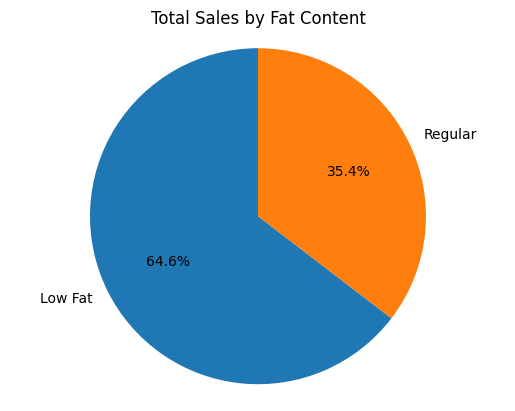

In [12]:
#total sales by fat content

sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%1.1f%%',startangle=90)
plt.title('Total Sales by Fat Content')
plt.axis('equal')
plt.show()


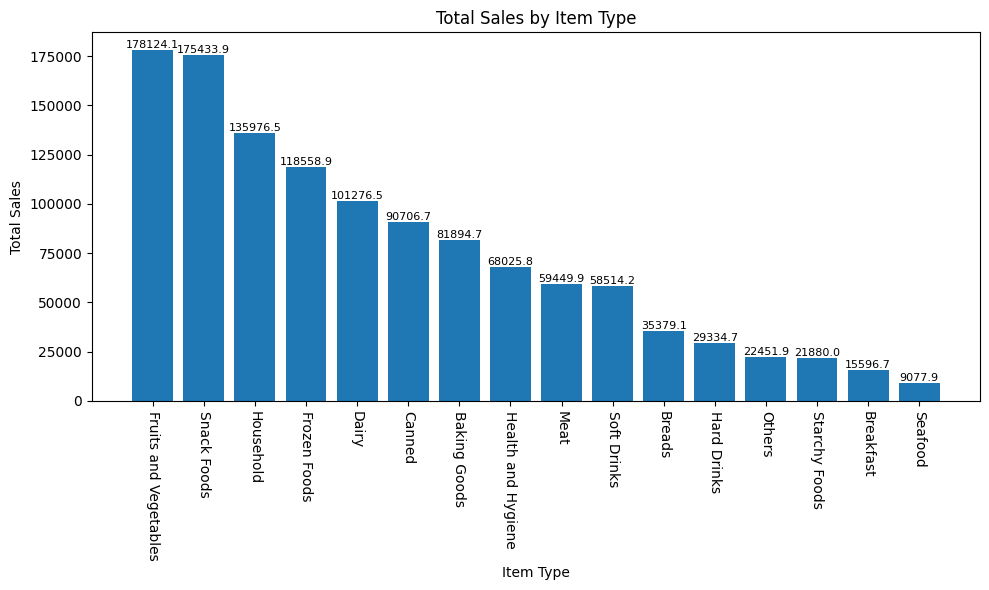

In [23]:
# Total Sales By Item Type
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.xticks(rotation=-90)

# Add value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             f'{bar.get_height():.1f}',
             ha='center', va='bottom',fontsize=8)

plt.tight_layout()  # ✅ fixed typo: was 'tigght_layout'
plt.show()


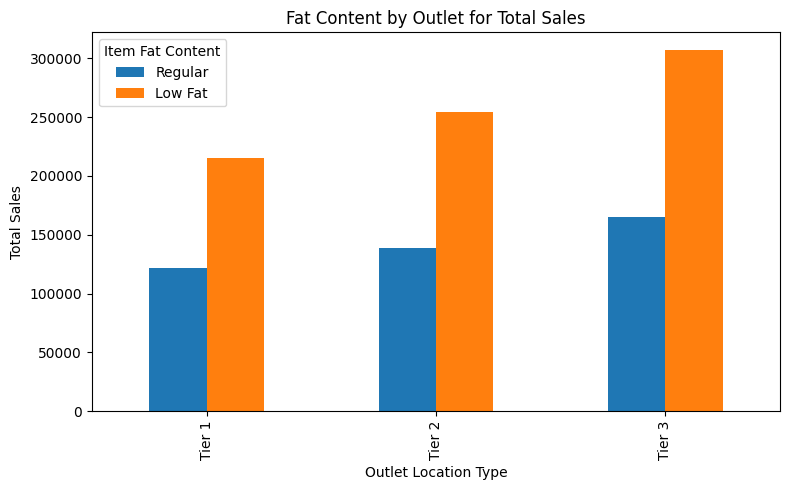

In [24]:
#Fat content by outlet for total sales

grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]

ax=grouped.plot(kind='bar',figsize=(8,5),title='Fat Content by Outlet for Total Sales')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

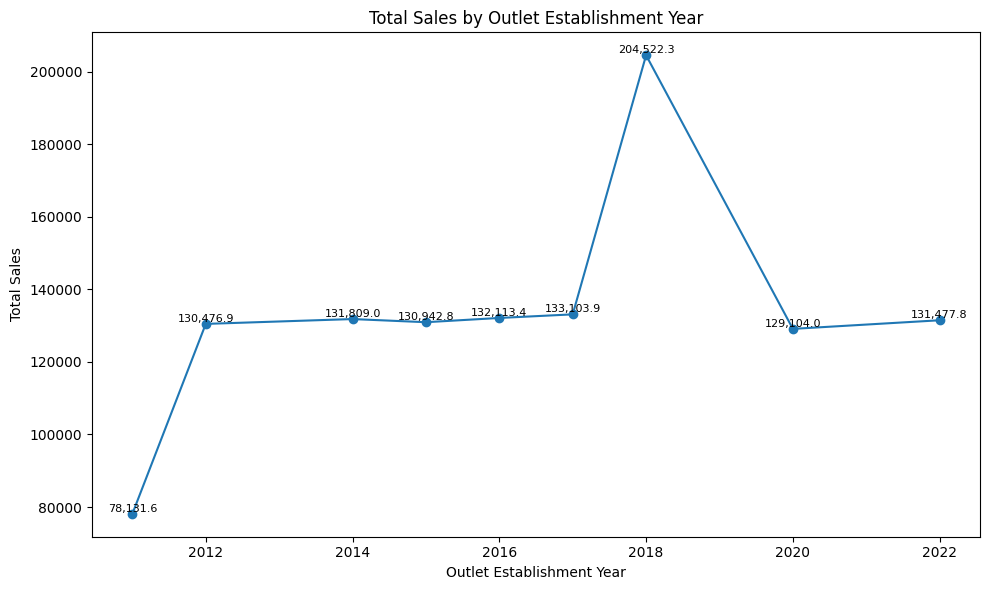

In [26]:
#Total Sales BY Outlet Establishment

sales_by_year=df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(10,6))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

for x,y in zip(sales_by_year.index,sales_by_year.values):
  plt.text(x,y,f'{y:,.1f}',ha='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.show()


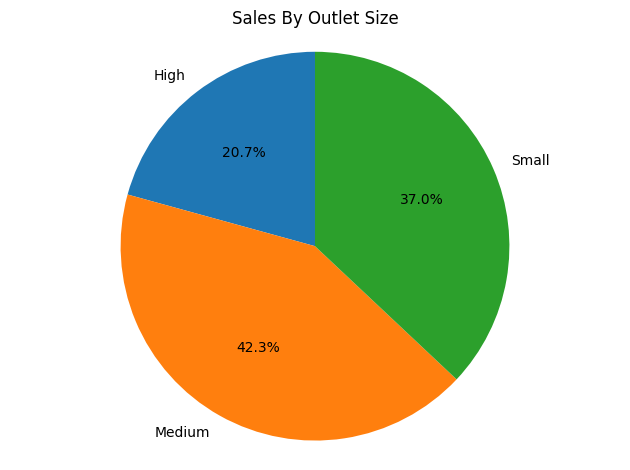

In [27]:
#Sales By Outlet Size

sales_by_size=df.groupby('Outlet Size')['Sales'].sum()
plt.pie(sales_by_size,labels=sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title('Sales By Outlet Size')
plt.axis('equal')
plt.tight_layout()
plt.show()

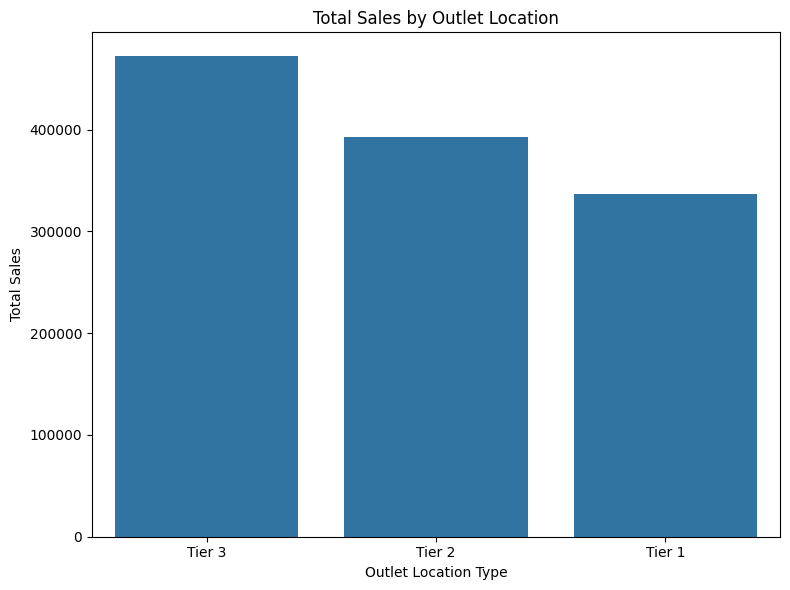

In [28]:
#sales by outlet location

sales_by_location=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location=sales_by_location.sort_values(by='Sales',ascending=False)

plt.figure(figsize=(8,6))
ax=sns.barplot(x='Outlet Location Type',y='Sales',data=sales_by_location)
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Location')
plt.tight_layout()
plt.show()